In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

**Задание 1.** Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):<br>
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],<br>
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].<br>
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [ ]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n=len(ks)

Проверим зависимость между данными, для этого создадим график

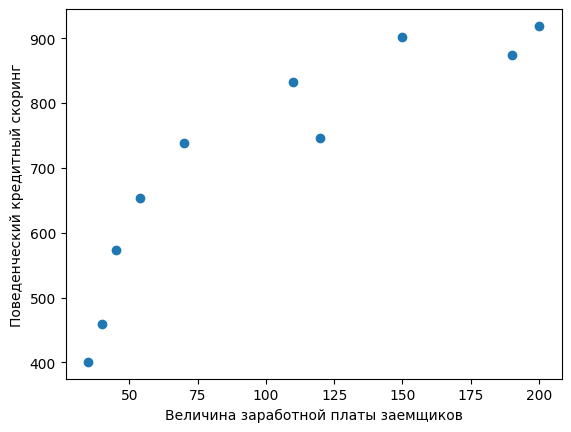

In [ ]:
plt.scatter(zp,ks)
plt.xlabel('Величина заработной платы заемщиков')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

#### с intercept

Как видно по графику наблюдается некая линейная зависимость между переменными.
Связь между переменными можно описать линейной функцией:    
$$\displaystyle ks=a+b\cdot zp$$  
Найдем коэффициент $b$ по формуле:  
$$b = \frac{n(\Sigma_{i=1}^nx_i)(\Sigma_{i=1}^ny_i)}{n\Sigma_{i=1}^nx_i^2 - (\Sigma_{i=1}^nx_i)^2}$$.

In [ ]:
b = (n*np.sum(zp*ks) - np.sum(zp)*np.sum(ks))/(n*np.sum(zp**2) - (np.sum(zp))**2)
print(round(b,2))

2.62


Найдем величину intercept $a$, которая показывает чему будет равна зависимая переменная, если независимая равна 0.
Расчитаем intercept по формуле:  
$$a=\bar y-b\cdot\bar x=\bar{ks}-b\cdot\bar{zp}$$

In [ ]:
a=np.mean(ks)-b*np.mean(zp)
print(round(a,2))

444.18


Линейная взаимосвязь между заработной платой и кредитным скорингом можно описать функцией:  
$$ks=444.18+2.62\cdot zp$$
Отобразим результаты на графике:

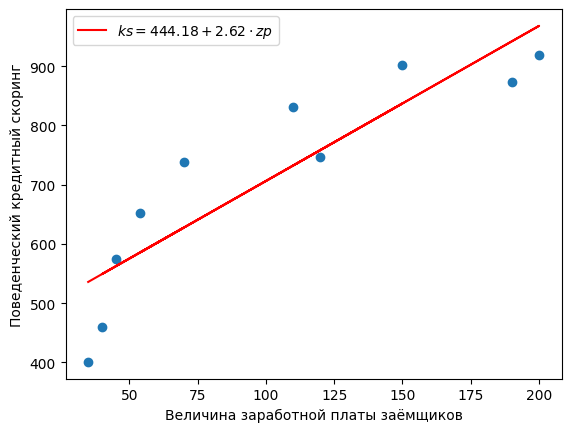

In [ ]:
plt.scatter(zp,ks)
plt.plot(zp, 444.18+2.62*zp, c='r', label=r'$ks=444.18+2.62\cdot zp$')
plt.legend()
plt.xlabel('Величина заработной платы заёмщиков')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

**Вывод:** Как видно из графика полученная функция $ks=444.18+2.62\cdot zp$ описывает линейную взаимосвязь между величиной заработной платы, и кредитного скоринга

#### без intercept

Без intercept будем использовать простейшую модель:
$$ks=b * zp$$



Величину коэффициена b расчитываем с помощью матричного метода

In [ ]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n=len(ks)

In [ ]:
zp=zp.reshape((1,n))
zp

array([[ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110]])

In [ ]:
ks=ks.reshape((1,n))
ks

array([[401, 574, 874, 919, 459, 739, 653, 902, 746, 832]])

In [ ]:
b = np.dot(np.dot(np.linalg.inv(np.dot(zp, zp.T)), zp), ks.T)[0][0]
print(round(b,2))

5.89


Отобразим на графике:

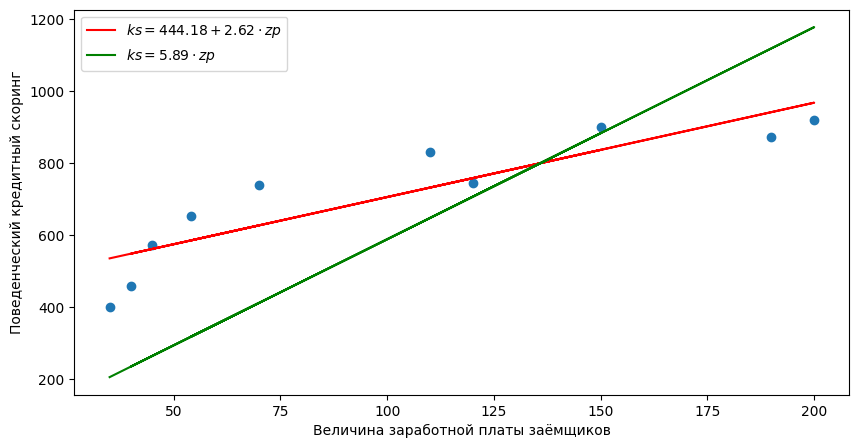

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(zp,ks)
plt.plot(zp, 444.18+2.62*zp, c='r', label=r'$ks=444.18+2.62\cdot zp$')
plt.plot(zp, b*zp, c='g', label=r'$ks=5.89\cdot zp$')
plt.legend()
plt.xlabel('Величина заработной платы заёмщиков')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

**Ответ:** Как видно из графика, полученная функция ks=444.18+2.62*zp рассчитанная без intercept описывает линейную взаимосвязь между величиной заработной платы, и кредитного скоринга намного хуже чем  с intercept

**Задание 2.** Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [152]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n=len(ks)


В качестве функции потерь выберем **среднеквадратичную** функцию:
$\displaystyle MSE=\frac{1}{n}\sum^{n}_{i=1}(\hat y_i-y_i)^2$  которая будет показывать, насколько далеко истинные значения зависимого признака будут находиться от линии регресии(расчетных значений)  

In [154]:
def mse(b, x, y):
    return np.sum((b*x-y)**2)/len(x)

Посчитаем значение для вычесленного нами коэффициента $b=2.62$ в первой задаче

In [99]:
mse(2.62, zp, ks)

203812.48504

Теперь подберем такое значение коэффициента $b$, при котором $MSE\rightarrow 0$, используя свойства производной.  
Для этого вычислим производную нашей функции потерь:   

In [155]:
def mse_p(b,x,y):
    return (2/len(x))*np.sum((b*x-y)*x)

Введем параметр - **скорость обучения** c помощью которого будем регулировать скорость подбора коэффициента $b$

In [106]:
alpha = 0.000001

In [156]:
b=0.1
mse_min=mse(b,zp,ks)
i_min=1
b_min=b
for i in range(10000):
    b-=alpha*mse_p(b,zp,ks)
    if i%100==0:
        print(f'Итерация #{i}, b={b}, mse={mse(b, zp,ks)}')
    if mse(b,zp,ks)>mse_min:
        print(f'Итерация #{i_min}, b={b_min}, mse={mse_min},\nДостигнут минимум.')
        break
    else:
        mse_min=mse(b,zp,ks)
        i_min=i
        b_min=b

Итерация #0, b=8.076404000000002, mse=122384.81853241447
Итерация #21, b=5.88982041725604, mse=56516.8584157194,
Достигнут минимум.


In [109]:
print(round(b_min, 2))

5.89


**Ответ:** Коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept) равен 5.89.

**Задание 3.** Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

Функция потерь:

In [157]:
def mse_ab(a,b, x, y):
    return np.sum(((a+b*x)-y)**2)/len(x)

Частная производная функции потерь по $a$:  

In [158]:
def mse_pa(a,b,x,y):
    return 2*np.sum((a+b*x)-y)/len(x)

Частная производная функции потерь по $b$:

In [159]:
def mse_pb(a,b,x,y):
    return 2*np.sum(((a+b*x)-y)*x)/len(x)

Скорость обучения:

In [160]:
alpha=5e-05

In [161]:
a=0.1
b=0.1
mseab_min=mse_ab(a,b,zp,ks)
i_min=1
b_min=b
a_min=a

for i in range(1000000):
    a-=alpha*mse_pa(a,b,zp,ks)
    b-=alpha*mse_pb(a,b,zp,ks)
    if i%50000==0:
        print(f'Итерация #{i}, a={a}, b={b}, mse={mse_ab(a, b, zp,ks)}')
    if mse_ab(a, b,zp,ks)>mseab_min:
        print(f'Итерация #{i_min}, a={a_min}, b={b_min}, mse={mseab_min},\nДостигнут минимум.')
        break
    else:
        mseab_min=mse_ab(a, b,zp,ks)
        i_min=i
        b_min=b
        a_min=a
print(f'a={round(a_min,2)}\nb={round(b_min,2)}')

Итерация #0, a=0.169966, b=8.07468054476, mse=122318.06397097567
Итерация #50000, a=319.27767648420047, b=3.5398324356503275, mse=10427.569111705801
Итерация #100000, a=409.0442373734796, b=2.879127619051743, mse=6783.521961452364
Итерация #150000, a=434.29473705519484, b=2.693277491833349, mse=6495.188684804794
Итерация #200000, a=441.3974680483413, b=2.6409995775222037, mse=6472.374468908443
Итерация #250000, a=443.39540029510493, b=2.62629428586797, mse=6470.569306309746
Итерация #300000, a=443.95740007610897, b=2.622157823932053, mse=6470.426473787141
Итерация #350000, a=444.1154853937451, b=2.6209942756156086, mse=6470.415172240385
Итерация #400000, a=444.159953325044, b=2.6206669802831115, mse=6470.414278011555
Итерация #450000, a=444.1724617410292, b=2.6205749151465225, mse=6470.414207256183
Итерация #500000, a=444.1759802422447, b=2.6205490180788695, mse=6470.414201657699
Итерация #520164, a=444.17653163778414, b=2.62054495966686, mse=6470.414201349592,
Достигнут минимум.
a=444